In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
def split(n):
    points = []
    for i in range(n):
        points.append(i/(n-1))
    return points

In [114]:
def build_matrix(x):
    n = len(x)
    h=1/(n-1)
    A = np.zeros((n,n))
    b = np.zeros(n)
    A[0,0] = -1/h
    A[0,1] = 1/h
    A[n-1, n-1] = 1
    b[0] = 1
    b[n-1] = np.log(2)
    for i in range(1,n-1):
        A[i,i+1] = -1/h**2
        A[i,i] = 2/h**2
        A[i,i-1] = -1/h**2
        b[i] = -1/(1+i*h)**2
    return A, b

In [115]:
def sweep(A,b):
    n = len(b)
    alpha = np.zeros(n-1)
    beta = np.zeros(n-1)
    alpha[0]= 1
    beta[0] = -1/(n-1)
    for i in range(1,n-1):
        alpha[i] = -A[i,i+1]/(A[i,i-1]*alpha[i-1]+A[i,i])
        beta[i] = (b[i] - A[i,i-1]*beta[i-1])/(A[i,i-1]*alpha[i-1] + A[i,i])
    y = np.zeros(n)
    y[n-1] = b[n-1]
    for i in range(n-2, -1,-1):
        y[i] = y[i+1] * alpha[i] + beta[i]
    return y

In [116]:
def error_norm(y, u):
    errors = []
    for i in range(len(y)):
        errors.append(np.abs(y[i] - u[i]))
    return np.max(errors)

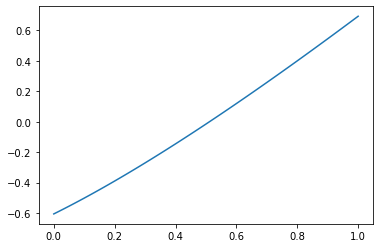

In [117]:
x = split(61)
A, b = build_matrix(x)
y = sweep(A,b)
plt.plot(x,y)

Норма ошибки = 0.008269680305463045


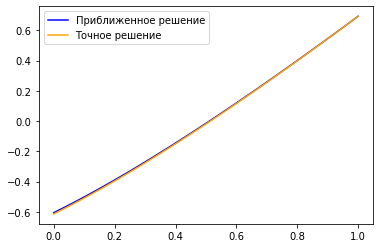

In [118]:
u = lambda x: -np.log(1+x) + 2*x + (2*np.log(2)-2)
uh = []
for xi in x:
    uh.append(u(xi))
    
print("Норма ошибки =", error_norm(uh,y))
plt.plot(x,y, color="blue", label="Приближенное решение")
plt.plot(x,uh, color="orange", label="Точное решение")
plt.legend()